In [34]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

import numpy as np
import pandas as pd
import tdt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from hc_extension import *

In [35]:
experiment_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc"
csv_base_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all_csvs/mpfc_csvs"
brain_region = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00

In [36]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc/p6-240823-105552/Notes.txt
read from t=0s to t=1807.06s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc/p2-240508-101128/Notes.txt
read from t=0s to t=1820.76s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc/pp4-250121-065035/Notes.txt
read from t=0s to t=1876.76s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc/p7-240824-053845/Notes.txt
read from t=0s to t=1790.87s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_Cage/all/mpfc/pp5-250121-110144/Notes.txt
read from t=0s to t=1895.67s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/all cohorts/C1_2_3_Home_

In [37]:
bout_definitions = [
    {'prefix': 'Short_Term', 'introduced': 'Short_Term_Introduced', 'removed': 'Short_Term_Removed'},
    {'prefix': 'Long_Term', 'introduced': 'Long_Term_Introduced', 'removed': 'Long_Term_Removed'},
    {'prefix': 'Novel', 'introduced': 'Novel_Introduced', 'removed': 'Novel_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions)

Processing behaviors for p6-240823-105552...
Processing behaviors for p2-240508-101128...
Processing behaviors for pp4-250121-065035...
Processing behaviors for p7-240824-053845...
Processing behaviors for pp5-250121-110144...
Processing behaviors for pp3-250121-055222...
Processing behaviors for pp1-250120-094415...
Processing behaviors for pp6-250121-114116...
Processing behaviors for p1-240508-084607...
Processing behaviors for pp7-250121-134131...
Processing behaviors for pp8-250121-142227...
Processing behaviors for p5-240823-093250...
Processing behaviors for p3-240509-070801...
Processing behaviors for p8-240824-070451...
Processing behaviors for pp2-250121-123301...
Processing behaviors for p4-240509-083601...


## Total Investigation Time & Average Bout Duration

In [ ]:
desired_bouts = ["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"]

trial_dfs = get_trial_dataframes(experiment)

# Cut last 5 minutes of first Short_Term interval per trial
cleaned_dfs = cut_last_5min_short_term(trial_dfs)

# Proceed with creating summary or analysis
summary_df = create_subject_summary_df(cleaned_dfs)

pivot = process_investigation_data(
    summary_df,
    behavior_name="Investigation",   # or "Approach" if you prefer
    gap_threshold=0.3,
    min_duration=.00000000000000001,
    desired_bouts=desired_bouts,
    agg_func='sum'
)

# total it

In [90]:
# Define the desired order of the bars
desired_order = ["Acq-ST", "Short Term", "Long Term", "Novel"]

# Map original bout names to new labels
bout_rename_mapping = {
    "Short_Term-1": "Acq-ST",
    "Short_Term-2": "Short Term",
    "Long_Term-1": "Long Term",
    "Novel-1": "Novel"
}

# Rename columns in pivot_df
pivot_df = pivot.rename(columns=bout_rename_mapping)

# Reorder columns based on desired order
pivot_df = pivot_df[desired_order]

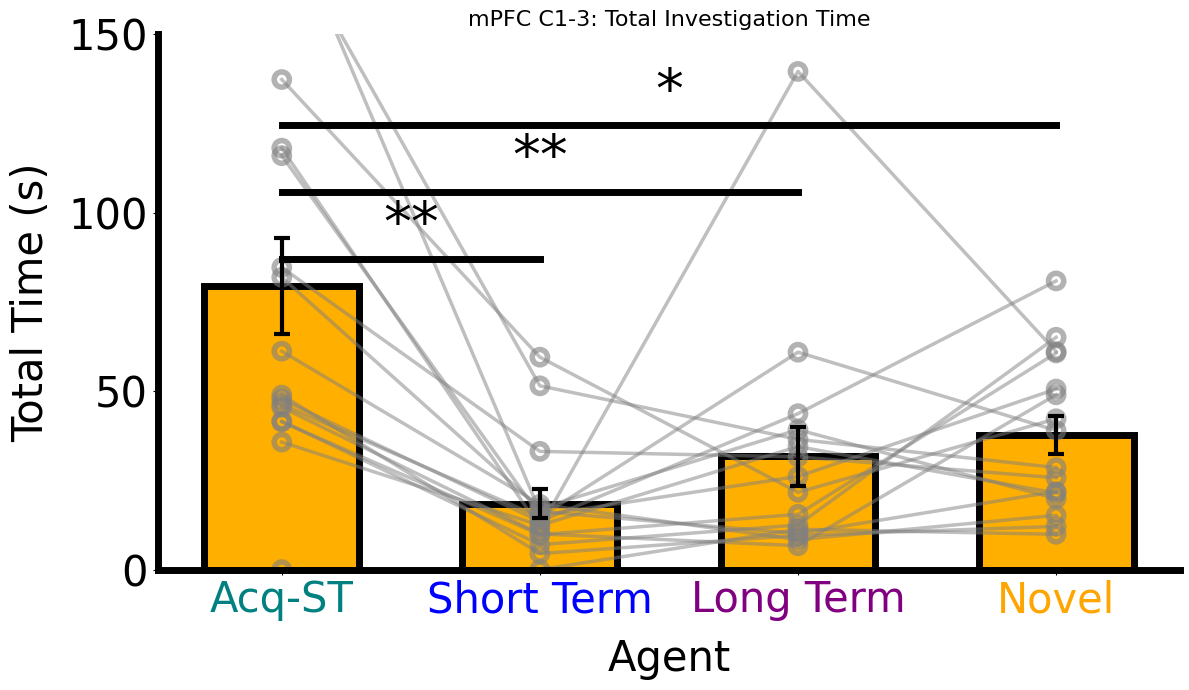

In [91]:
plot_y_across_bouts_gray(
    df=pivot_df,
    title="mPFC C1-3: Total Investigation Time",
    ylabel="Total Time (s)",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(0,150),
    yticks_increment=50,
    bar_color=brain_region,
    xlabel="Agent",
    figsize=(12,7),
    pad_inches=0.1
)

### Average Bout Duration

In [45]:
desired_bouts = ["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"]

dfs = get_trial_dataframes(experiment)
ready_df = create_subject_summary_df(dfs)

pivot = process_investigation_data(
    ready_df,
    behavior_name="Investigation",   # or "Approach" if you prefer
    gap_threshold=0.3,
    min_duration=.00000000000000001,
    desired_bouts=desired_bouts,
    agg_func='mean'
)

In [46]:
# Define the desired order of the bars
desired_order = ["Acq-ST", "Short Term", "Long Term", "Novel"]

# Map original bout names to new labels
bout_rename_mapping = {
    "Short_Term-1": "Acq-ST",
    "Short_Term-2": "Short Term",
    "Long_Term-1": "Long Term",
    "Novel-1": "Novel"
}

# Rename columns in pivot_df
pivot_df = pivot.rename(columns=bout_rename_mapping)

# Reorder columns based on desired order
pivot_df = pivot_df[desired_order]

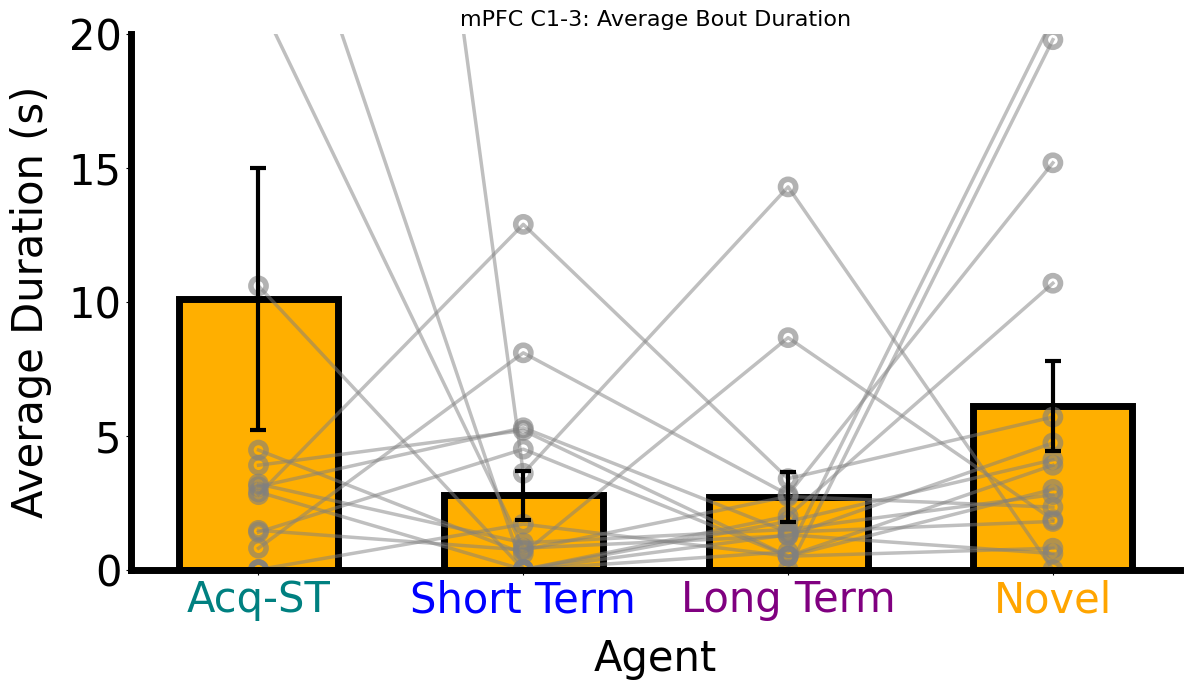

In [87]:
plot_y_across_bouts_gray(
    df=pivot_df,
    title="mPFC C1-3: Average Bout Duration",
    ylabel="Average Duration (s)",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(0,20),
    yticks_increment=5,
    bar_color=brain_region,
    xlabel="Agent",
    figsize=(12,7),
    pad_inches=0.1
)

## Standard DA

In [48]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# calculate event induced
experiment.compute_all_event_induced_DA(pre_time=4, post_time=5)

# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(
    use_fractional=True,       # Enable fractional analysis (limits window to max_bout_duration)
    max_bout_duration=5,       # Set the maximum bout duration to 5 seconds
    use_adaptive=True,         # Enable adaptive peak-following window
    allow_bout_extension=True, # Allow extending the bout window if needed
    mode='standard'                 # Consider only the first investigation event per bout
)

Processing behaviors for p6-240823-105552...
Processing behaviors for p2-240508-101128...
Processing behaviors for pp4-250121-065035...
Processing behaviors for p7-240824-053845...
Processing behaviors for pp5-250121-110144...
Processing behaviors for pp3-250121-055222...
Processing behaviors for pp1-250120-094415...
Processing behaviors for pp6-250121-114116...
Processing behaviors for p1-240508-084607...
Processing behaviors for pp7-250121-134131...
Processing behaviors for pp8-250121-142227...
Processing behaviors for p5-240823-093250...
Processing behaviors for p3-240509-070801...
Processing behaviors for p8-240824-070451...
Processing behaviors for pp2-250121-123301...
Processing behaviors for p4-240509-083601...
Computing event-induced DA for trial p6-240823-105552 ...
Computing event-induced DA for trial p2-240508-101128 ...
Computing event-induced DA for trial pp4-250121-065035 ...
Computing event-induced DA for trial p7-240824-053845 ...
Computing event-induced DA for trial pp

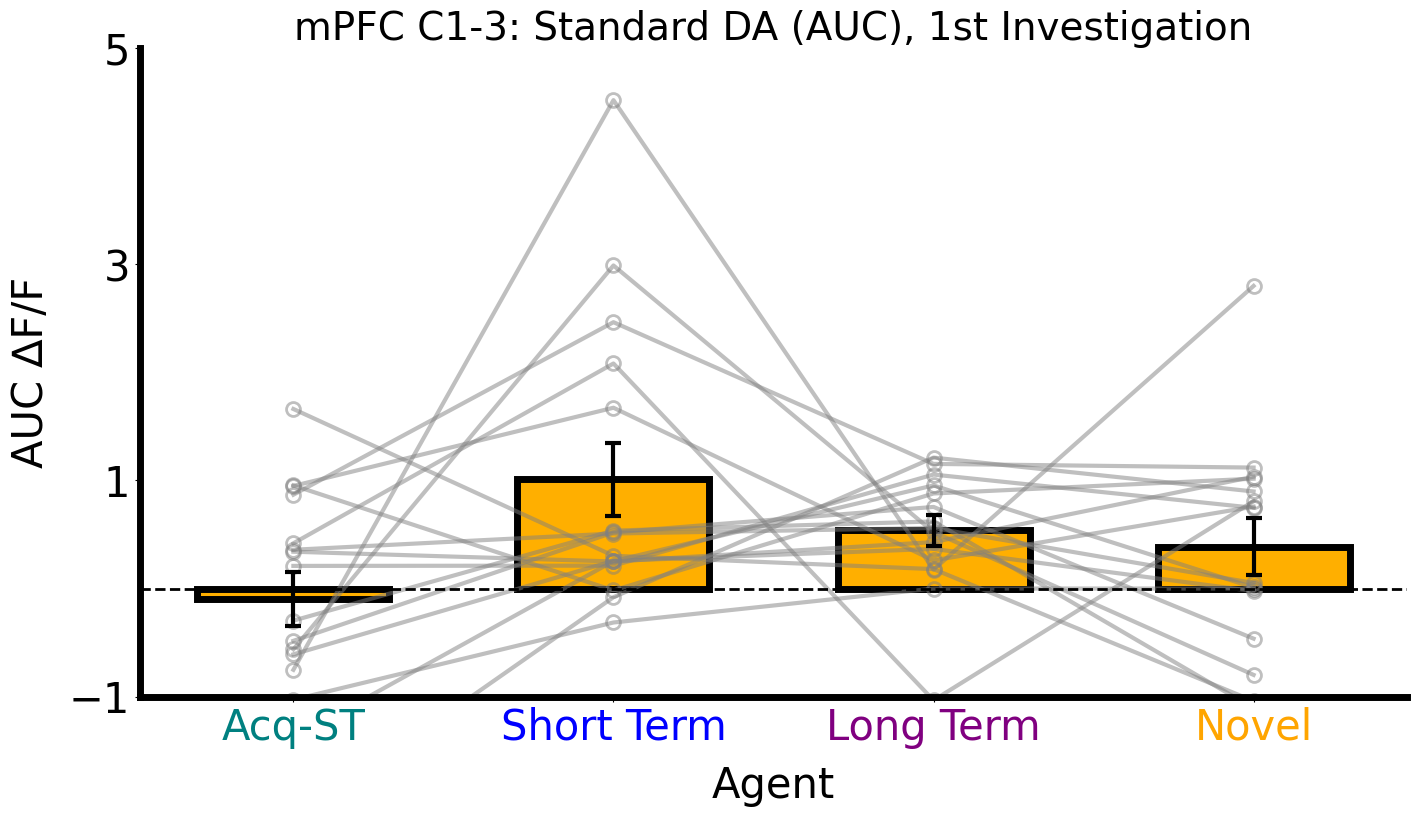

In [109]:
from scipy.stats import ttest_rel

plot_da_metrics_combined_oneplot_integrated(experiment,
                                                metric_name="AUC", 
                                                title="mPFC C1-3: Standard DA (AUC), 1st Investigation", 
                                                ylabel="AUC ∆F/F", 
                                                xlabel="Agent", 
                                                custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
                                                custom_xtick_colors=["teal", "blue", "purple", "orange"], 
                                                ylim=(-1, 5), 
                                                bar_color=brain_region, 
                                                yticks_increment=2, 
                                                figsize=(14,8), 
                                                pad_inches=0.1)

# Mean Z-scored ∆F/F

## Event-Induced DA

In [110]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# calculate event induced
experiment.compute_all_event_induced_DA(pre_time=4, post_time=5)

experiment.compute_all_da_metrics(
    use_fractional=True,       # Enable fractional analysis (limits window to max_bout_duration)
    max_bout_duration=5,       # Set the maximum bout duration to 5 seconds
    use_adaptive=True,         # Enable adaptive peak-following window
    allow_bout_extension=True, # Allow extending the bout window if needed
    mode='EI'                 # Consider only the first investigation event per bout
)

Processing behaviors for p6-240823-105552...
Processing behaviors for p2-240508-101128...
Processing behaviors for pp4-250121-065035...
Processing behaviors for p7-240824-053845...
Processing behaviors for pp5-250121-110144...
Processing behaviors for pp3-250121-055222...
Processing behaviors for pp1-250120-094415...
Processing behaviors for pp6-250121-114116...
Processing behaviors for p1-240508-084607...
Processing behaviors for pp7-250121-134131...
Processing behaviors for pp8-250121-142227...
Processing behaviors for p5-240823-093250...
Processing behaviors for p3-240509-070801...
Processing behaviors for p8-240824-070451...
Processing behaviors for pp2-250121-123301...
Processing behaviors for p4-240509-083601...
Computing event-induced DA for trial p6-240823-105552 ...
Computing event-induced DA for trial p2-240508-101128 ...
Computing event-induced DA for trial pp4-250121-065035 ...
Computing event-induced DA for trial p7-240824-053845 ...
Computing event-induced DA for trial pp

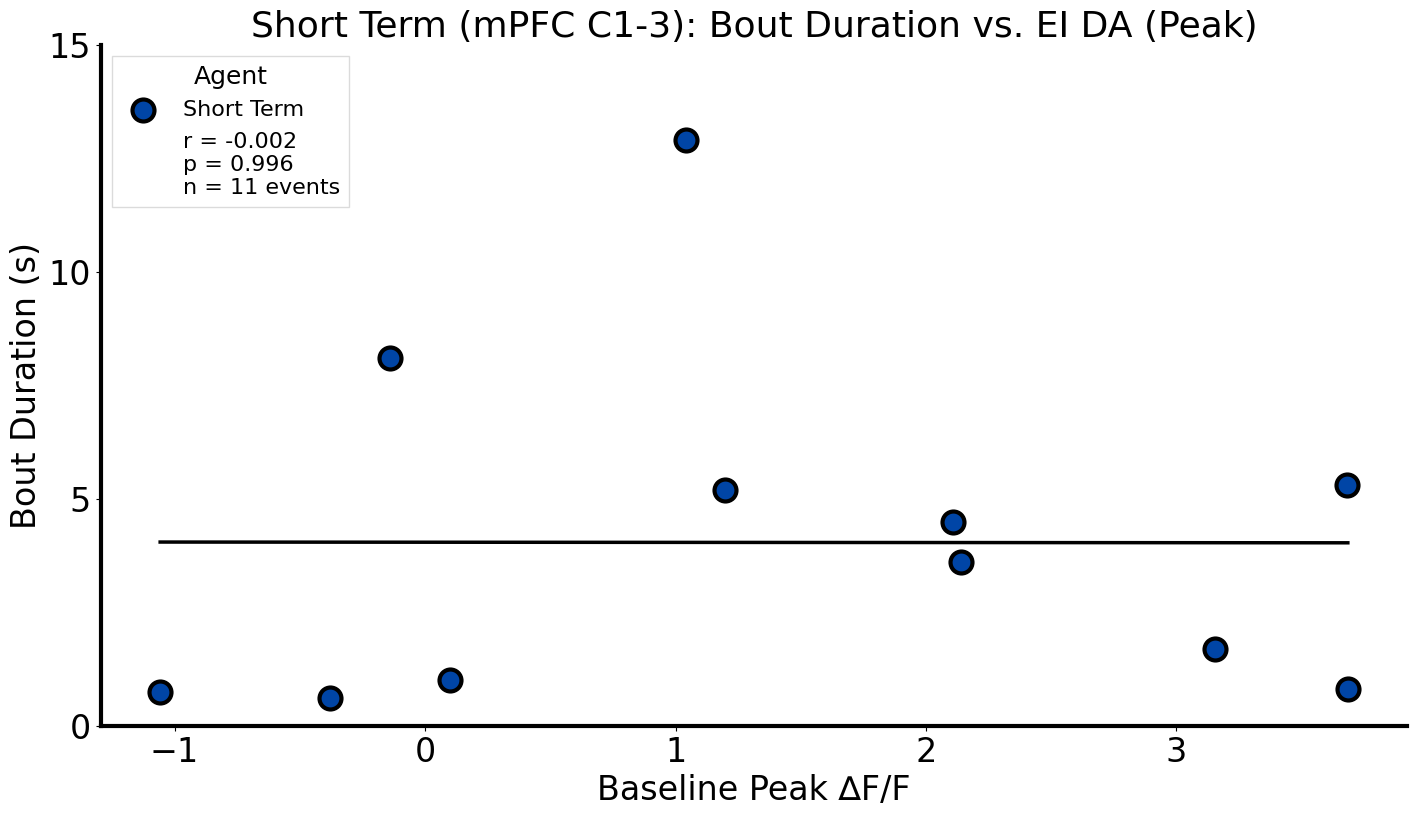

In [ ]:
#agent_colors = {'Acq-ST': '#00B7D7', 'Novel': '#E06928'}
#agent_labels = {'Short_Term': 'Acq-ST','Novel': 'Novel'}

agents_of_interest = ['Short_Term-2']
agent_colors = {'Short Term': '#0045A6'}
agent_labels = {'Short_Term':'Short Term'}

points_df = plot_da_vs_duration_by_agent(
    experiment=experiment,
    agents_of_interest=agents_of_interest,
    agent_colors=agent_colors,
    agent_labels=agent_labels,
    title="Short Term (mPFC C1-3): Bout Duration vs. EI DA (Peak)",
    da_metric='Max Peak',  # or 'Max Peak', or 'Mean Z-score'
    figsize=(14, 8),
    ylim=(0, 15),
    yticks_increment=5,
    xlabel = "Baseline Peak ∆F/F",
    legend_loc='upper left'
)
# Baseline Z-scored ∆F/F
# ['#00B7D7','#0045A6','#A839A4','#E06928'], light blue, dark blue, purple, orange

### Colored

/var/folders/tj/nfn3dynx2n19r7566d88xmsc0000gn/T/ipykernel_77676/1160676858.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_subjects))  # Can change to 'nipy_spectral' etc.


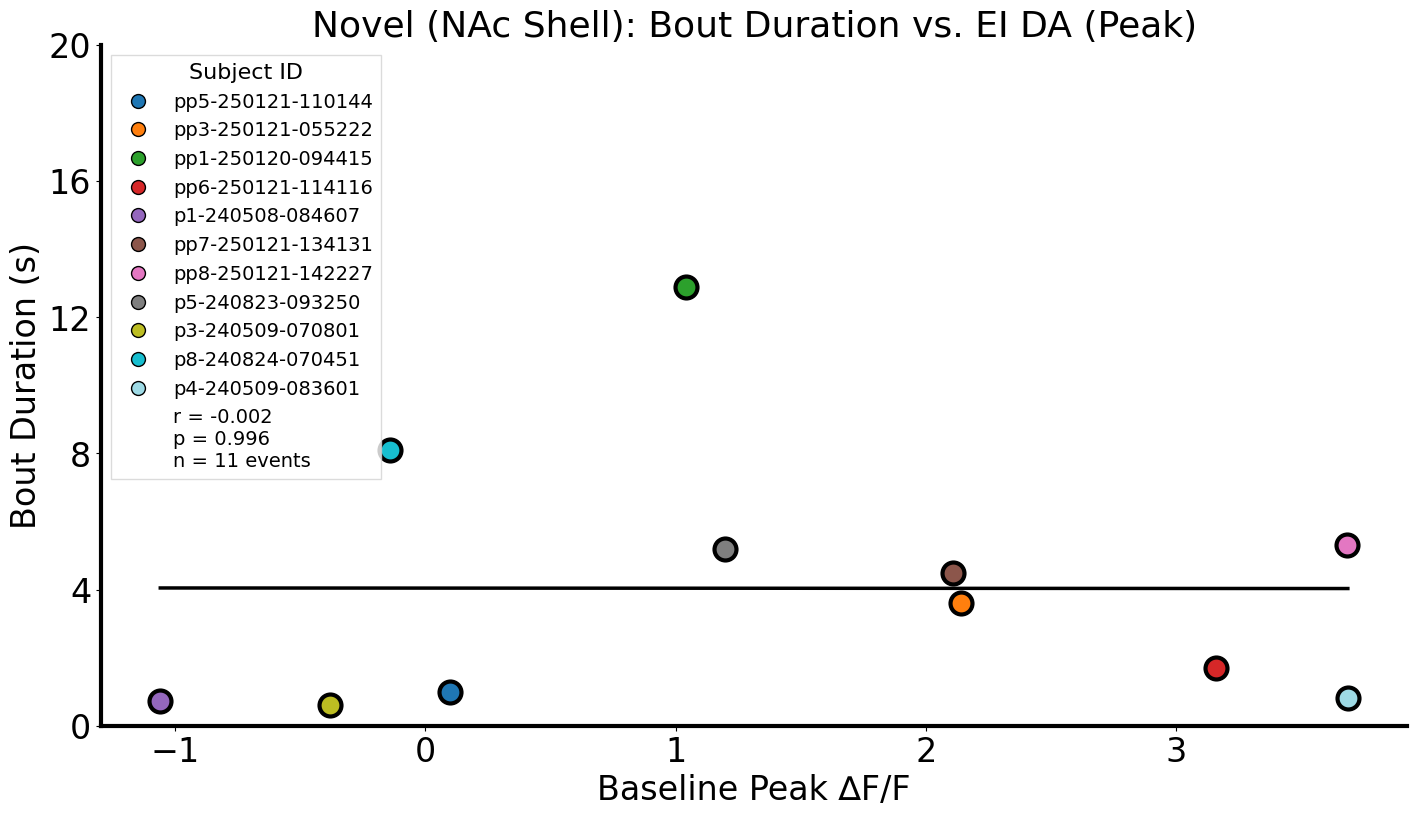

In [ ]:
points_df = plot_da_vs_duration_by_agent_colored(
    experiment=experiment,
    agents_of_interest=agents_of_interest,
    agent_labels=agent_labels,
    title="Novel (NAc Shell): Bout Duration vs. EI DA (Peak)",
    da_metric='Max Peak',  # or 'Max Peak', or 'Mean Z-score'
    figsize=(14, 8),
    ylim=(0, 20),
    yticks_increment=4,
    xlabel = "Baseline Peak ∆F/F",
    legend_loc='upper left'
)

### Event-Induced Plots

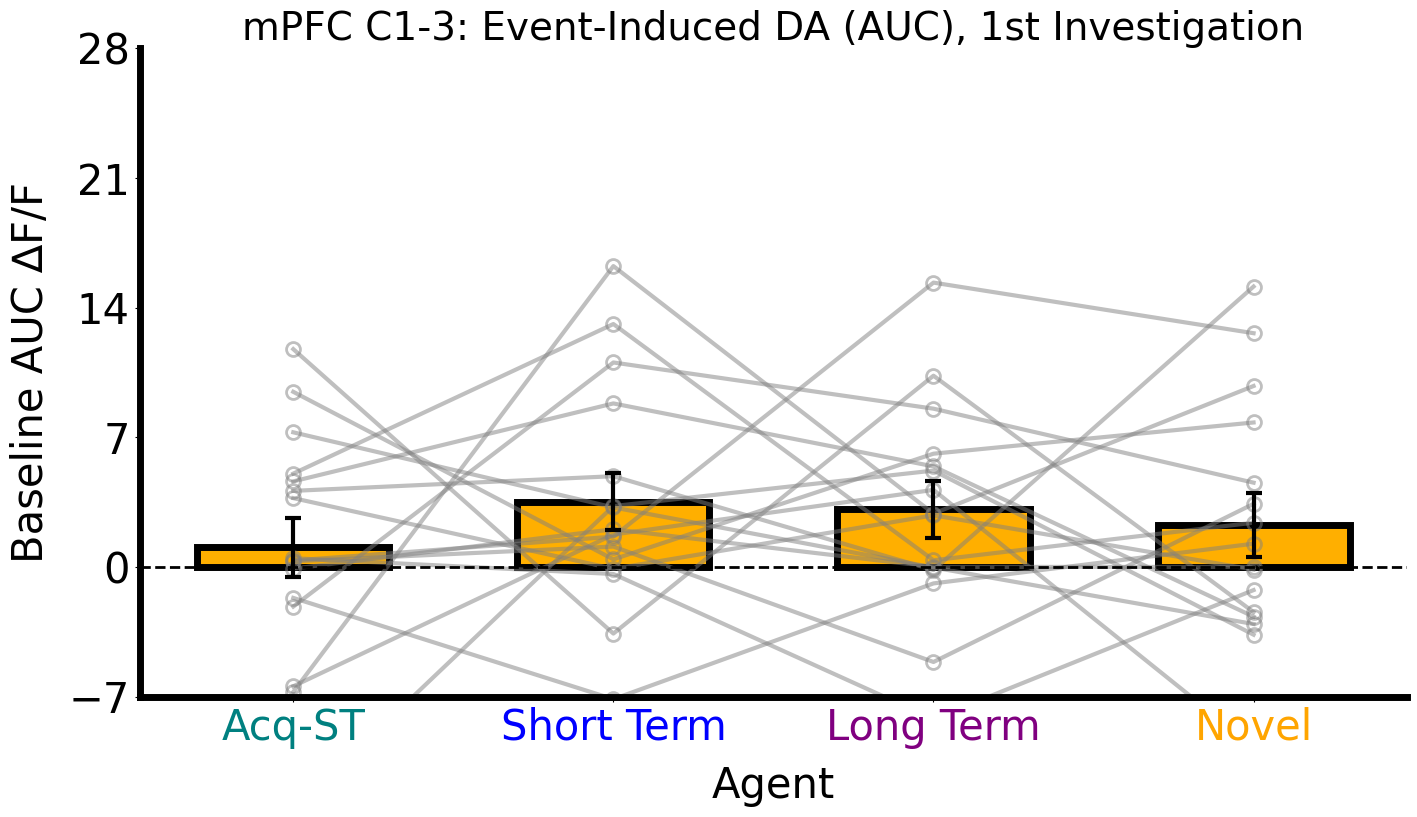

In [144]:
plot_da_metrics_combined_oneplot_integrated(experiment,
                                                metric_name="AUC", 
                                                title="mPFC C1-3: Event-Induced DA (AUC), 1st Investigation", 
                                                ylabel="Baseline AUC ∆F/F", 
                                                xlabel="Agent", 
                                                custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
                                                custom_xtick_colors=["teal", "blue", "purple", "orange"], 
                                                ylim=(-7, 28), 
                                                bar_color=brain_region, 
                                                yticks_increment=7, 
                                                figsize=(14,8), 
                                                pad_inches=0.1)

## 1st Investigation Stuff

In [ ]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = None)

experiment.compute_all_da_metrics(
    use_fractional=True,       # Enable fractional analysis (limits window to max_bout_duration)
    max_bout_duration=5,       # Set the maximum bout duration to 5 seconds
    use_adaptive=True,         # Enable adaptive peak-following window
    allow_bout_extension=True, # Allow extending the bout window if needed
    mode='standard'                 # Consider only the first investigation event per bout
)

Processing behaviors for p6-240823-105552...
Processing behaviors for p2-240508-101128...
Processing behaviors for pp4-250121-065035...
Processing behaviors for p7-240824-053845...
Processing behaviors for pp5-250121-110144...
Processing behaviors for pp3-250121-055222...
Processing behaviors for pp1-250120-094415...
Processing behaviors for pp6-250121-114116...
Processing behaviors for p1-240508-084607...
Processing behaviors for pp7-250121-134131...
Processing behaviors for pp8-250121-142227...
Processing behaviors for p5-240823-093250...
Processing behaviors for p3-240509-070801...
Processing behaviors for p8-240824-070451...
Processing behaviors for pp2-250121-123301...
Processing behaviors for p4-240509-083601...
Computing DA metrics for p6-240823-105552 ...
Computing DA metrics for p2-240508-101128 ...
Computing DA metrics for pp4-250121-065035 ...
Computing DA metrics for p7-240824-053845 ...
Computing DA metrics for pp5-250121-110144 ...
Computing DA metrics for pp3-250121-0552

In [56]:
df_labeled = create_behavior_labeled_dataframe(
    experiment=experiment,
    behavior="Investigation",
    n_start=1,  # Currently unused in this version, but you can incorporate it if needed
    n_end=5
)

In [58]:
df_mean = compute_mean_by_bout_label(df_labeled, value_column="Mean Z-score")
df_mean

,Bout,behavior_label,Mean Z-score_mean
0,Long_Term-1,1,0.464778
1,Long_Term-1,2,0.339764
2,Long_Term-1,3,-0.013680
3,Long_Term-1,4,0.026805
4,Long_Term-1,5,-0.040636
5,Novel-1,1,0.872212
6,Novel-1,2,0.331585
7,Novel-1,3,0.298282
8,Novel-1,4,-0.026606
9,Novel-1,5,0.100279


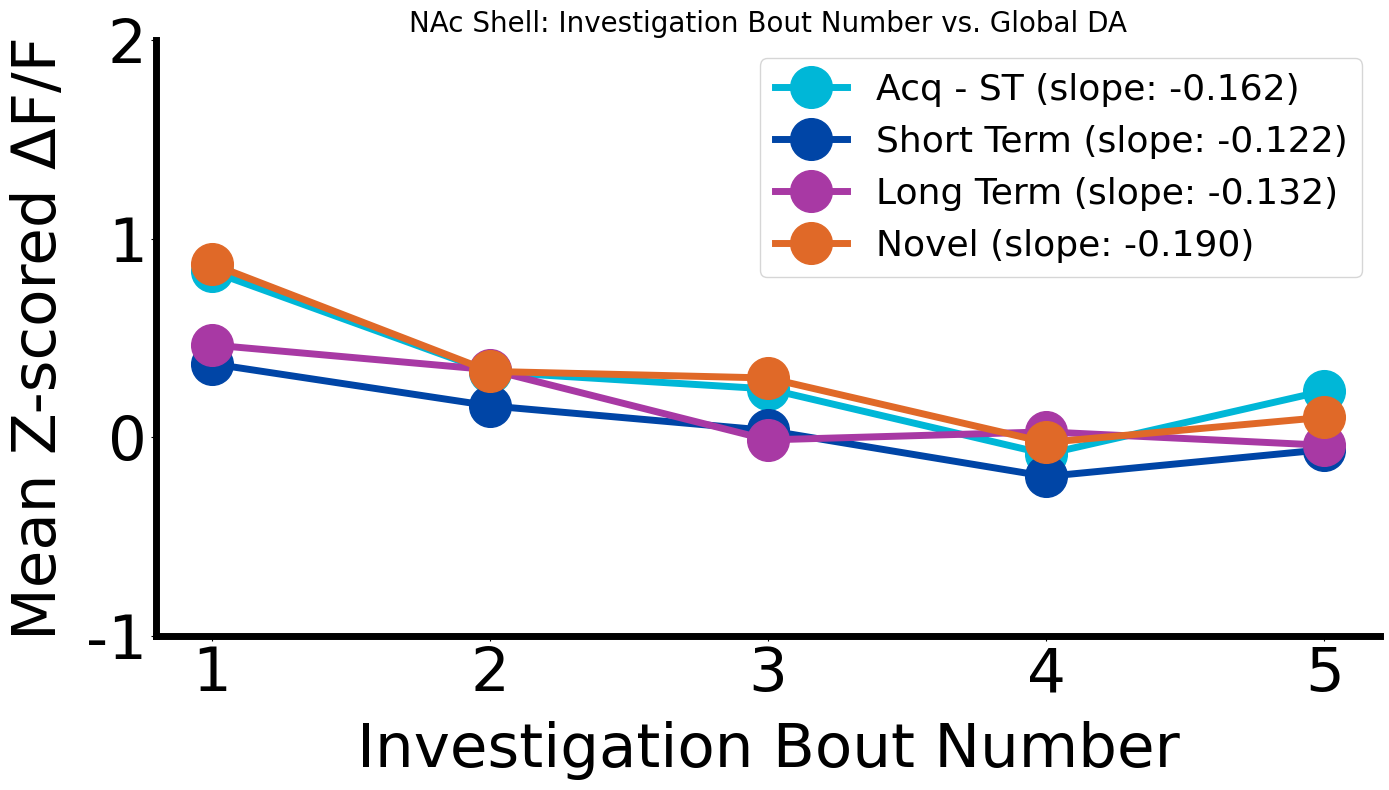


=== Computed Metric (SLOPE): ===
Bout: Short_Term-1, slope = -0.162
Bout: Short_Term-2, slope = -0.122
Bout: Long_Term-1, slope = -0.132
Bout: Novel-1, slope = -0.190


'\nplot_mean_across_bouts_custom_v2(\n    df_mean=df_mean,\n    metric_col="Mean Z-score_mean",\n    metric_type=\'slope\',\n    line_order=line_order,\n    custom_colors=custom_colors,\n    custom_legend_labels=custom_legend_labels,\n    custom_xtick_labels=[1, 2, 3, 4, 5],\n    ylim=(-1, 2),\n    ytick_increment=1,  # <-- Automatically sets -1, 0, 1, 2\n    xlabel="Investigation Bout Number",\n    ylabel="Mean Z-scored ΔF/F",\n    plot_title="C1-3 (mPFC) Investigation Bout Number vs. Global DA"\n)\n'

In [ ]:
# Mapping: Real Bout Labels -> Legend Labels
label_mapping = {
    'Short_Term-1': 'Acq-ST',
    'Short_Term-2': 'Short Term',
    'Long_Term-1': 'Long Term',
    'Novel-1': 'Novel'
}

# Define plotting order of real bout labels
line_order = ['Short_Term-1', 'Short_Term-2', 'Long_Term-1', 'Novel-1']

# Matching colors for legend labels (poster order)
custom_colors = ['#00B7D7','#0045A6','#A839A4','#E06928']  # Teal, Dark Blue, Purple, Orange

# Matching legend labels (poster)
custom_legend_labels = ['Acq - ST', 'Short Term', 'Long Term', 'Novel']

# Call the plotting function with mapping support
plot_mean_across_bouts_custom_v2(
    df_mean=df_mean,
    metric_col="Mean Z-score_mean",
    metric_type='slope',
    line_order=line_order,
    custom_colors=custom_colors,
    custom_legend_labels=custom_legend_labels,
    custom_xtick_labels=[1, 2, 3, 4, 5],
    ylim=(-1, 2),
    ytick_increment=1,  # <-- Automatically sets -1, 0, 1, 2
    xlabel="Investigation Bout Number",
    ylabel="Mean Z-scored ΔF/F",
    plot_title="NAc Shell: Investigation Bout Number vs. Global DA"
)

## Ranks Stuff

In [64]:
rank_csv_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-3/Cohort_3_Ranks.csv"  # Update to your real CSV path
assign_subject_ranks_to_experiment(experiment, rank_csv_path)

Ranks assigned to 8 trials.
No rank found for trials: ['p6-240823-105552', 'p2-240508-101128', 'p7-240824-053845', 'p1-240508-084607', 'p5-240823-093250', 'p3-240509-070801', 'p8-240824-070451', 'p4-240509-083601']


In [66]:
agent_df = generate_investigation_per_agent_df(experiment, rank_csv_path=rank_csv_path)
agent_df

,Rank,Total_Long_Term-1,Total_Novel-1,Total_Short_Term-1,Total_Short_Term-2,Avg_Long_Term-1,Avg_Novel-1,Avg_Short_Term-1,Avg_Short_Term-2
Subject,,,,,,,,,
p6-,0.0,15.500,60.700,41.400,9.800,1.291667,6.744444,2.587500,1.633333
p2-,0.0,60.931,38.999,46.262,14.729,3.046550,5.571286,3.084133,1.472900
pp4,2.0,12.500,65.100,41.600,7.000,2.083333,13.020000,5.942857,1.750000
p7-,0.0,36.500,28.600,179.300,51.500,1.825000,2.860000,5.783871,2.861111
pp5,4.0,26.100,50.600,116.000,15.200,3.728571,2.811111,4.461538,1.900000
pp3,1.0,139.599,61.100,118.100,11.800,10.738385,6.788889,9.084615,5.900000
pp1,3.0,39.200,19.900,81.900,17.200,4.900000,3.316667,7.445455,4.300000
pp6,3.0,6.700,49.000,45.500,10.000,0.957143,5.444444,2.394737,1.666667
p1-,0.0,31.599,25.734,84.666,33.134,2.257071,2.144500,3.023786,3.681556


Plotting Rank 4 subjects: 2 entries.


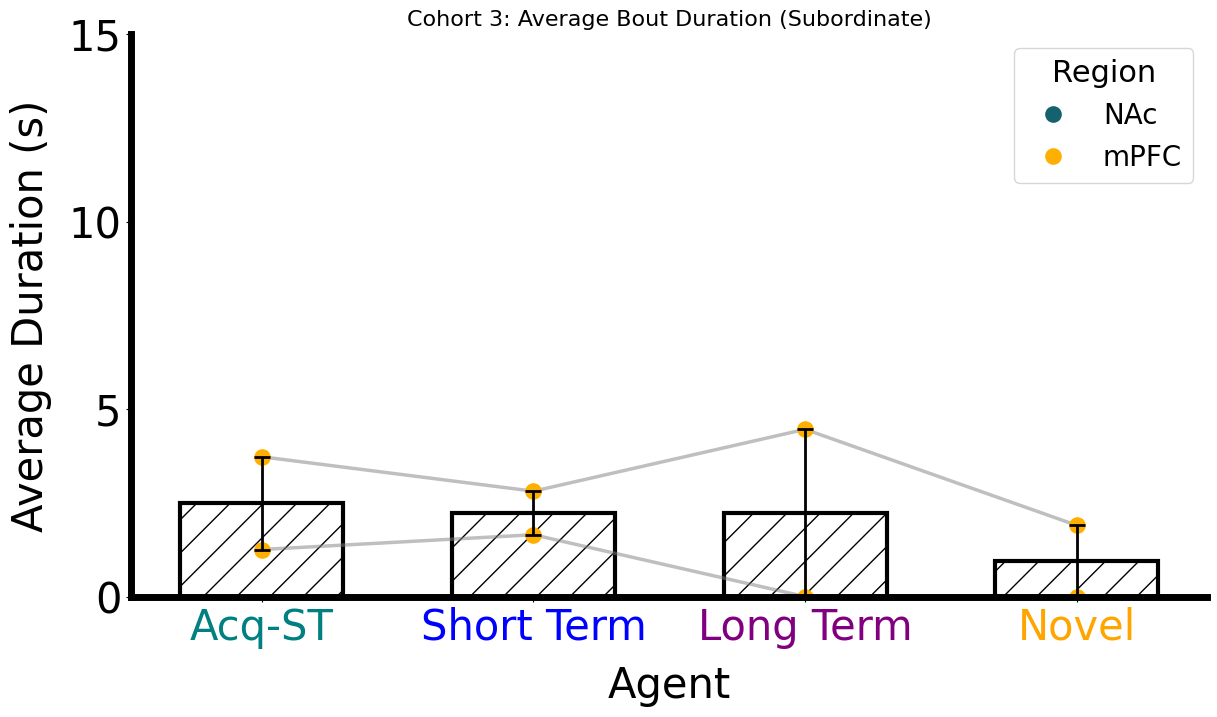

In [ ]:
#plt.savefig(f'{title}{ylabel[0]}.png', transparent=True, bbox_inches='tight', pad_inches=pad_inches)

plot_y_across_bouts_ranks(
    df=agent_df,
    title="Cohort 3: Average Bout Duration (Subordinate)",
    ylabel="Average Duration (s)",
    metric='Avg',  # OR 'Avg'
    rank_filter=4,  # Optional: plot only rank 1 mice
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(0, 15),
    yticks_increment=5,
    bar_fill_color='white',     
    bar_edge_color='black',     
    bar_linewidth=3,            
    bar_hatch='/'         
)

In [70]:
combined_df = assign_ranks_and_combine_da_metrics(experiment, rank_csv_path=rank_csv_path)
combined_df

Skipped trial 'p6-240823-105552' — no rank match or empty behaviors.
Skipped trial 'p2-240508-101128' — no rank match or empty behaviors.
Skipped trial 'p7-240824-053845' — no rank match or empty behaviors.
Skipped trial 'p1-240508-084607' — no rank match or empty behaviors.
Skipped trial 'p5-240823-093250' — no rank match or empty behaviors.
Skipped trial 'p3-240509-070801' — no rank match or empty behaviors.
Skipped trial 'p8-240824-070451' — no rank match or empty behaviors.
Skipped trial 'p4-240509-083601' — no rank match or empty behaviors.
Ranks assigned to 8 trials. Combined DataFrame shape: (292, 13)


,Bout,Behavior,Event_Start,Event_End,Duration (s),AUC,Max Peak,Time of Max Peak,Mean Z-score,Original End,Adjusted End,Rank,Subject
0,Long_Term-1,Approach,1200.5,1202.799,2.299,-1.903130,3.731413,1495.394520,-0.002857,1202.799,1866.739839,2,pp4
1,Long_Term-1,Approach,1204.0,1205.299,1.299,-1.432540,3.731413,1495.394520,-0.002163,1205.299,1866.739839,2,pp4
2,Long_Term-1,Investigation,1196.1,1198.100,2.000,1.878959,1.647107,1197.431170,1.322590,1198.100,1197.520626,2,pp4
3,Long_Term-1,Investigation,1202.8,1203.200,0.400,0.110842,0.723495,1202.800534,0.590412,1203.200,1202.988295,2,pp4
4,Long_Term-1,Investigation,1205.3,1212.700,7.400,-0.388650,0.155781,1206.276563,-0.308073,1212.700,1206.562628,2,pp4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Novel-1,Investigation,1189.4,1191.200,1.800,-0.434082,-0.351544,1190.003320,-0.497425,1191.200,1190.273656,4,pp2
288,Novel-1,Investigation,1328.2,1328.600,0.400,1.012194,3.978274,1785.238943,0.001965,1328.600,1842.706477,4,pp2
289,Novel-1,Investigation,1359.2,1359.400,0.200,0.136230,0.998886,1359.224805,0.917580,1359.400,1359.348668,4,pp2
290,Novel-1,Investigation,1412.7,1413.300,0.600,-0.020604,-0.768856,1412.700214,-0.776186,1413.300,1412.726756,4,pp2


In [ ]:
def plot_da_metric_across_bouts(df,  
                                da_metric='Mean Z-score',  # New param
                                title='Mean DA Metric Across Bouts', 
                                ylabel='DA Value', 
                                custom_xtick_labels=None, 
                                custom_xtick_colors=None, 
                                ylim=None, 
                                bar_fill_color='white',     
                                bar_edge_color='black',     
                                bar_linewidth=3,            
                                bar_hatch='///',            
                                yticks_increment=None, 
                                xlabel='Agent',
                                figsize=(12,7), 
                                pad_inches=0.1,
                                rank_filter=None):
    """
    Plots the selected DA metric (e.g., AUC, Max Peak, Mean Z-score) per Agent with SEM bars and per-subject dots.

    Parameters:
        - df (DataFrame): Combined behaviors DataFrame including DA metrics and Rank.
        - da_metric (str): 'AUC', 'Max Peak', or 'Mean Z-score'.
        - rank_filter (int or None): If provided, plots only subjects of this rank.
        [Other params same as before]
    """

    # --- Filter Rank ---
    if rank_filter is not None:
        if "Rank" not in df.columns:
            print("Rank filtering requested, but 'Rank' column not found.")
            return
        df = df[df["Rank"] == rank_filter]
        if df.empty:
            print(f"No data for Rank {rank_filter}.")
            return
        print(f"Plotting Rank {rank_filter} subjects: {len(df['Subject'].unique())} unique subjects.")

    # --- Validate Metric ---
    valid_metrics = ['AUC', 'Max Peak', 'Mean Z-score']
    if da_metric not in valid_metrics:
        print(f"Invalid DA metric '{da_metric}'. Must be one of {valid_metrics}")
        return

    # --- Pivot Data: Subjects × Bouts (columns: Bouts, values: selected metric) ---
    pivot_df = (
        df.pivot_table(index='Subject', columns='Bout', values=da_metric, aggfunc='mean')
          .fillna(0)
    )

    if pivot_df.empty:
        print("Pivoted DataFrame is empty. Check input data.")
        return

    # --- T-tests ---
    def perform_t_tests(df_vals):
        comparisons = {
            "acq_st_vs_short_term": ("Acq-ST", "Short Term"),
            "acq_st_vs_long_term": ("Acq-ST", "Long Term"),
            "acq_st_vs_novel": ("Acq-ST", "Novel")
        }
        results = {}
        for key, (b1, b2) in comparisons.items():
            if b1 in df_vals.columns and b2 in df_vals.columns:
                paired = df_vals[[b1, b2]].dropna()
                if len(paired) > 1:
                    t_stat, p_value = ttest_rel(paired[b1], paired[b2])
                    results[key] = {"t_stat": t_stat, "p_value": p_value}
        return results

    t_test_results = perform_t_tests(pivot_df)

    # --- Stats ---
    mean_vals = pivot_df.mean()
    sem_vals = pivot_df.sem()

    fig, ax = plt.subplots(figsize=figsize)

    # --- Bar Plot ---
    ax.bar(pivot_df.columns, mean_vals, yerr=sem_vals, capsize=6,
           color=bar_fill_color, edgecolor=bar_edge_color, linewidth=bar_linewidth,
           width=0.6, hatch=bar_hatch,
           error_kw=dict(elinewidth=2, capthick=2, zorder=5))

    # --- Lines + Colored Dots ---
    for subj_id, row in pivot_df.iterrows():
        prefix = str(subj_id).lower().strip()
        if prefix.startswith('n'):
            dot_color = '#15616F'  # NAc
        elif prefix.startswith('p'):
            dot_color = '#FFAF00'  # mPFC
        else:
            dot_color = 'gray'

        # Gray line
        ax.plot(pivot_df.columns, row.values, linestyle='-', color='gray',
                alpha=0.5, linewidth=2.5, zorder=1)

        # Colored opaque dots (no border, behind error bars)
        ax.scatter(pivot_df.columns, row.values, color=dot_color,
                   s=120, alpha=1.0, zorder=1)

    # --- Labels ---
    ax.set_ylabel(ylabel, fontsize=30, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=30, labelpad=12)
    ax.set_title(title, fontsize=18)

    # --- X-ticks ---
    ax.set_xticks(np.arange(len(pivot_df.columns)))
    if custom_xtick_labels:
        ax.set_xticklabels(custom_xtick_labels, fontsize=28)
        if custom_xtick_colors:
            for tick, color in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick.set_color(color)
    else:
        ax.set_xticklabels(pivot_df.columns, fontsize=26)

    ax.tick_params(axis='y', labelsize=30)
    ax.tick_params(axis='x', labelsize=30)

    # --- Y-limits ---
    all_vals = np.concatenate([pivot_df.values.flatten(), mean_vals.values])
    if ylim is None:
        min_val = np.nanmin(all_vals)
        max_val = np.nanmax(all_vals)
        lower_ylim = 0 if min_val > 0 else min_val * 1.1
        upper_ylim = max_val * 1.1
        ax.set_ylim(lower_ylim, upper_ylim)
        if lower_ylim < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)
    else:
        ax.set_ylim(ylim)
        if ylim[0] < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)

    # --- Y-ticks ---
    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        y_ticks = np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment)
        ax.set_yticks(y_ticks)

    # --- Aesthetic ---
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)

    # --- Significance Markers ---
    if t_test_results:
        max_y = ax.get_ylim()[1]
        sig_y_offset = max_y * 0.05
        comparisons = {
            "acq_st_vs_short_term": (0, 1),
            "acq_st_vs_long_term": (0, 2),
            "acq_st_vs_novel": (0, 3)
        }
        line_spacing = sig_y_offset * 2.5
        current_y = mean_vals.max() + sig_y_offset

        for key, (x1, x2) in comparisons.items():
            if key in t_test_results:
                p_value = t_test_results[key]["p_value"]
                if p_value < 0.05:
                    significance = "**" if p_value < 0.01 else "*"
                    ax.plot([x1, x2], [current_y, current_y], color='black', linewidth=5)
                    ax.text((x1 + x2) / 2, current_y + sig_y_offset / 1.5, significance,
                            fontsize=40, ha='center', color='black')
                    current_y += line_spacing

    '''
    # --- Legend for Dots ---
    legend_elements = [
        Line2D([0], [0], marker='o', color='none', label='NAc',
               markerfacecolor='#15616F', markersize=12, markeredgewidth=0),
        Line2D([0], [0], marker='o', color='none', label='mPFC',
               markerfacecolor='#FFAF00', markersize=12, markeredgewidth=0)
    ]
    ax.legend(handles=legend_elements, title="Region", fontsize=20, title_fontsize=22,
              loc='upper right', frameon=True)
    '''
    # Save and show
    plt.tight_layout(pad=pad_inches)
    #plt.savefig(f'{title}_{da_metric}.png', transparent=True, bbox_inches='tight', pad_inches=pad_inches)
    plt.show()


Plotting Rank 4 subjects: 2 unique subjects.


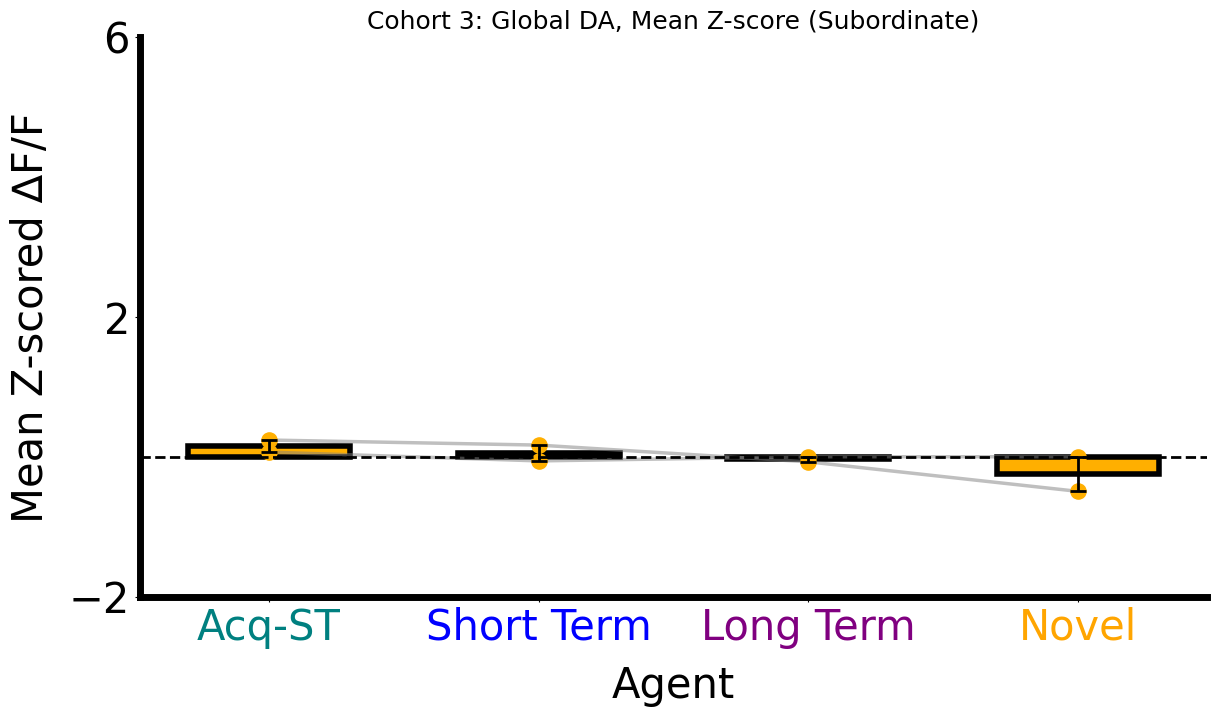

In [72]:
plot_da_metric_across_bouts(combined_df,
                            da_metric='Mean Z-score',
                            title='Cohort 3: Global DA, Mean Z-score (Subordinate)',
                            ylabel='Mean Z-scored ∆F/F',
                            bar_fill_color=brain_region,
                            bar_edge_color="Black",
                            bar_linewidth=4,
                            bar_hatch=None,
                            rank_filter=4,  # Plot only Rank 1 mice
                            custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
                            custom_xtick_colors=["teal", "blue", "purple", "orange"],
                            ylim=(-2, 6),
                            yticks_increment=4)

#Mean Z-scored ∆F/F